In [1]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

import matplotlib.pyplot as plt

%matplotlib notebook

# Read in the data files

In [2]:
def dtype_from_header(fname):
    with open(fname, 'r') as f:
        header_line = f.readline()
    dtyp = np.dtype([(item, float) for item in header_line.split()])
    return dtyp

In [3]:
fnames = [
         # "Ising/Canonical_near_phase/longnear1_header.txt",
         "Ising/Canonical_near_phase/all_no_gyration_radius_header.txt",
         # "Ising/Main/longnear_header.txt",
         # "Ising/Main1/longnear_header.txt",
         # "Ising/Main2/longnear_header.txt", 
           "Ising/long_chains_header.txt",
         ]

# figure dtypes for all files and check they are the same

dtyps = [dtype_from_header(fname) for fname in fnames]
assert all(dtyps[0] == dt for dt in dtyps[1:])

dtyp = dtyps[0]
dtyp

dtype([('N', '<f8'), ('J', '<f8'), ('h', '<f8'), ('mean_R_sq', '<f8'), ('err_mean_R_sq', '<f8'), ('mean_R_gyr_sq', '<f8'), ('err_mean_R_gyr_sq', '<f8'), ('mean_e', '<f8'), ('err_mean_e', '<f8'), ('mean_e_sq', '<f8'), ('err_mean_e_sq', '<f8'), ('mean_e_fourth', '<f8'), ('err_mean_e_fourth', '<f8'), ('mean_m', '<f8'), ('err_mean_m', '<f8'), ('mean_m_sq', '<f8'), ('err_mean_m_sq', '<f8'), ('mean_m_fourth', '<f8'), ('err_mean_m_fourth', '<f8'), ('steps', '<f8')])

In [4]:
datas = [np.loadtxt(fname, skiprows=1, dtype=dtyp) for fname in fnames[:2]]
dfs = [pd.DataFrame(data) for data in datas]

df = pd.concat(dfs)
df

,N,J,h,mean_R_sq,err_mean_R_sq,mean_R_gyr_sq,err_mean_R_gyr_sq,mean_e,err_mean_e,mean_e_sq,err_mean_e_sq,mean_e_fourth,err_mean_e_fourth,mean_m,err_mean_m,mean_m_sq,err_mean_m_sq,mean_m_fourth,err_mean_m_fourth,steps
0,1000.0,0.720,0.0,1.422760e+04,2.470860e+01,1.782070e+04,419.897000,1.024690,0.000189,1.052350,0.000387,1.117410,0.000814,0.000702,0.000485,0.017930,0.000056,0.000946,0.000006,3.200000e+11
1,100.0,0.720,0.0,4.750760e+02,5.471300e-02,3.769240e+02,0.320388,0.993353,0.000028,1.007340,0.000059,1.098620,0.000135,0.000018,0.000119,0.144596,0.000035,0.051082,0.000022,5.829000e+11
2,10.0,0.720,0.0,1.816920e+01,1.746760e-04,1.157750e+01,0.000466,0.764019,0.000007,0.685656,0.000010,0.700161,0.000017,0.000022,0.000033,0.493534,0.000008,0.389277,0.000008,5.767000e+11
3,150.0,0.720,0.0,8.547440e+02,1.611560e-01,7.362120e+02,1.141460,1.005080,0.000038,1.024620,0.000077,1.109670,0.000167,0.000196,0.000135,0.104490,0.000038,0.028384,0.000019,5.689000e+11
4,250.0,0.720,0.0,1.806800e+03,5.033650e-01,1.729280e+03,4.904170,1.014360,0.000057,1.037950,0.000118,1.115120,0.000256,-0.000049,0.000185,0.066847,0.000042,0.012292,0.000015,5.678000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,10000.0,0.845,0.0,5.408180e+04,3.758820e+04,1.896920e+04,15300.000000,0.386477,0.005754,0.150533,0.004884,0.023479,0.001844,0.774806,0.020626,0.627254,0.024853,0.433504,0.024053,1.750000e+11
87,10000.0,0.848,0.0,1.508710e+04,5.035690e+03,8.050960e+03,5007.610000,0.362588,0.001443,0.131990,0.001128,0.017716,0.000359,0.855128,0.005292,0.737006,0.008260,0.557493,0.010691,1.600000e+11
88,10000.0,0.851,0.0,6.960100e+04,5.793320e+04,2.578140e+04,22725.700000,0.358818,0.007533,0.130053,0.006237,0.017898,0.002339,0.855048,0.015927,0.740802,0.023161,0.569714,0.027310,1.450000e+11
89,10000.0,0.854,0.0,8.817070e+04,7.693770e+04,3.296650e+04,28830.300000,0.346082,0.006331,0.121132,0.005321,0.015776,0.002180,0.877503,0.016633,0.779026,0.024408,0.627178,0.028771,1.400000e+11


# Analyze the square end-to-end distance, $\langle R^2 \rangle$


Similar to the pure interacting SAW, `/home/br/sweethome/SAW/SAW/runs_conf_hcap`

In [5]:
# cf S. Caracciolo et al, arXiv:1012.1177
# also Rensburg, Chap 9

nu = 4./7
phi = 3./7
# U_theta = 1./1.4986  # : pure interacting SAW (no spins)

<IPython.core.display.Javascript object>


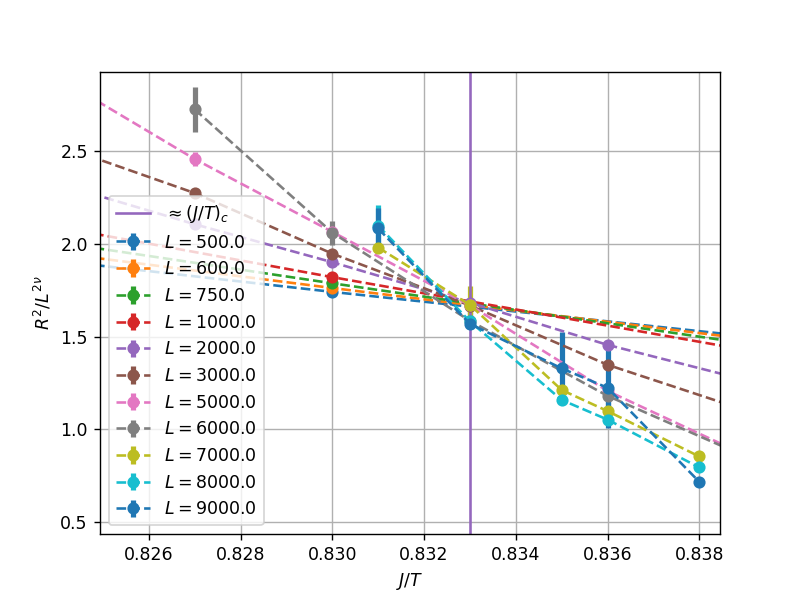

In [33]:
fig, ax = plt.subplots(1, 1)

for N, grp in df.groupby("N"):
    
    if 500 > N or N == 7500 or N > 9000:
        continue
    
    ax.errorbar(grp["J"], grp["mean_R_sq"] / N**(2*nu), yerr=grp["err_mean_R_sq"] / N**(2*nu),
                fmt='o--', elinewidth=3, label=r"$L=%s$" % N)

    
# visual inspection of the data collaps
J_theta = 0.833

ax.axvline(J_theta, label=r'$\approx(J/T)_c$', color='C4')
ax.set_xlim([0.82, 0.84])
ax.set_ylim([0, 3])
ax.set_ylabel(r'$R^2 / L^{2\nu}$')
ax.set_xlabel(r'$J/T$')
ax.legend(loc='best')
plt.grid(True)
plt.show()

## Try the data collapse for $R^2$ with known exponents

Eq. (3.1) of `S. Caracciolo, arXiv:1012.1177`:

$$
\langle R^2 \rangle / L^{2\nu} = a + b L^{\phi} (\beta - \beta_\theta)
$$

Here $\beta = 1/T$, hence  $\propto J/T$, which is our $J$

<IPython.core.display.Javascript object>


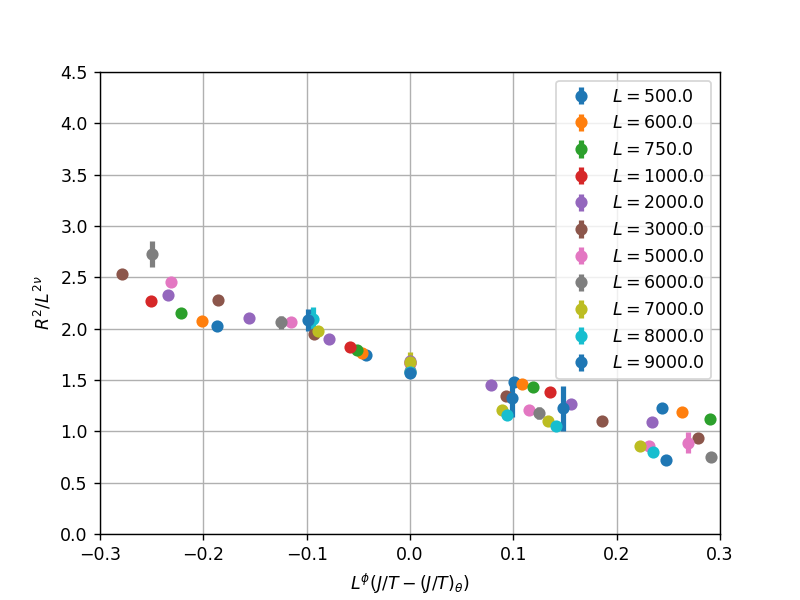

In [32]:
fig, ax = plt.subplots(1, 1)

J_theta = 0.833  # visual inspection


for N, grp in df.groupby("N"):
    
    if 400 > N or N == 7500 or N > 9000:
        continue
    
    ax.errorbar((grp["J"] - J_theta) * N**phi,
                grp["mean_R_sq"] / N**(2*nu),
                yerr=grp["err_mean_R_sq"] / N**(2*nu),
                fmt='o', elinewidth=3, label=r"$L=%s$" % N)

ax.set_ylabel(r'$R^2 / L^{2\nu}$')
ax.set_xlabel(r'$ L^{\phi} \left(J/T - (J/T)_\theta \right)$')
ax.set_xlim([-0.3, 0.3])
ax.set_ylim([0, 4.5])
ax.legend(loc='best')
plt.grid(True)
plt.show()